### Este proyecto consiste en realizar la clasificación de sentencias médicas según su intención, es decir, relacionar si en la sentencia se refieren a un tratamiento (prescripción de medicamentos), o si están asociando una causa con alguna enfermedad.

### El dataset implementado consta de tres archivos cvs en los cuales se encuentra información relacionada con la historia clínica de pacientes. En particular tiene una columna 'sentence' en la cual se encuentran sentencias médicas de diferentes longitudes y una columna 'relation' en la cual se expone la intención de la sentencia. Lss diferentes relaciones que se pueden encontrar en la columna relation son 9: 'treats', 'diagnosed by', 'contraindicates', 'causes', 'location', 'is location of', 'location of', 'is diagnosed by', 'diagnose_by_test_or_drug'

### Se tiene dentro de los tres cvs (train con 13340, test con 4566, validation con 4270) las sentencias médicas están repetidas

### La distribución de las clases o la instención de las sentencias se ilustrará más adelante


### Esta tarea de clasificación es muy útil dado que puede servir como herramienta de soporte en  la búsqueda automática de información en tareas que requieren el análisis sistemático de muchos datos como lo es la evaluación de tecnología en salud. Ahorrando tiempo, reduciendo sesgos, entre otros


In [0]:
import collections
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, LSTM, Input, Dense, TimeDistributed, Embedding, Activation, RepeatVector, Bidirectional, Concatenate, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import one_hot
from keras.utils import np_utils 
import pandas as pd

# Descarga de DataSet

In [3]:
!wget https://www.dropbox.com/s/j8v4lzef5kzr0se/DataSet.zip?dl=0

--2019-06-04 00:14:12--  https://www.dropbox.com/s/j8v4lzef5kzr0se/DataSet.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/j8v4lzef5kzr0se/DataSet.zip [following]
--2019-06-04 00:14:12--  https://www.dropbox.com/s/raw/j8v4lzef5kzr0se/DataSet.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0022f347aaefccf3747704484c.dl.dropboxusercontent.com/cd/0/inline/AiJpUfkfFnmgoSaOnav4K_Y_T3e6R4qf4YcB9PkF7GUjyUuygmXlef4n87re7quIBoq1NLqfmsF3Xt_S12dZWCZhl1w6cVbNeWEgLQ5olMncbQ/file# [following]
--2019-06-04 00:14:12--  https://uc0022f347aaefccf3747704484c.dl.dropboxusercontent.com/cd/0/inline/AiJpUfkfFnmgoSaOnav4K_Y_T3e6R4qf4YcB9PkF7GUjyUuygmXlef4n87re7quIBoq1NLqfmsF3Xt_S12dZWCZhl1w6cVbNeWEgLQ5olMncbQ/file
Resolving uc0022f

In [4]:
!unzip DataSet.zip?dl=0

Archive:  DataSet.zip?dl=0
replace DataSet/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: DataSet/test.csv        
  inflating: DataSet/train.csv       
  inflating: DataSet/validation.csv  


In [5]:
train = pd.read_csv('/content/DataSet/train.csv')
train.head(2)

,_unit_id,_created_at,_canary,_id,_started_at,_channel,_trust,_worker_id,_country,_region,_city,_ip,direction,b1,b2,direction_gold,e1,e2,relation,relex_relcos,sent_id,sentence,term1,term2,twrex
0,502808352,7/13/2014 13:48:35,NaN,1321892767,7/13/2014 13:48:14,clixsense,0.9167,27871219,NLD,07,Amsterdam,87.210.207.223,IM CEFTRIAXONE treats URETHRAL OR RECTAL GONOR...,41,128,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat
1,502808352,7/13/2014 13:51:12,NaN,1321894040,7/13/2014 13:51:07,neodev,0.8333,17610000,GBR,I2,Manchester,90.200.140.201,URETHRAL OR RECTAL GONORRHEA treats IM CEFTRIA...,41,128,NaN,69,142,treats,1.0,907845-FS1-2,"For treatment of uncomplicated cervical, URETH...",URETHRAL OR RECTAL GONORRHEA,IM CEFTRIAXONE,RO-may_treat


In [0]:
test = pd.read_csv('/content/DataSet/test.csv')

In [0]:
val = pd.read_csv('/content/DataSet/validation.csv')

# SEPARAR DATASET EN RELACIÓN A CAUSAS Y TRATAMIENTOS

In [8]:
x_train = train['sentence'].as_matrix()
y_train = train['relation'].as_matrix()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
x_val = val['sentence'].as_matrix()
y_val = val['relation'].as_matrix()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
y_val.shape

(4270,)

In [11]:
x_test = test['sentence'].as_matrix()
y_test = test['relation'].as_matrix()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
import matplotlib.pyplot as plt

In [0]:
treatTest = []
causeTest = []
relationTest = []
sentenceTest = []
for i in range(4566):
  if y_test[i] == 'treats':
    treatTest.append(x_test[i])
    relationTest.append(y_test[i])
    sentenceTest.append(x_test[i])
  if y_test[i] == 'causes':
    causeTest.append(x_test[i])
    relationTest.append(y_test[i])
    sentenceTest.append(x_test[i])

In [0]:
relationTest = pd.DataFrame(relationTest)

In [15]:
relationTest.head(5)

,0
0,causes
1,causes
2,causes
3,causes
4,causes


<BarContainer object of 2 artists>

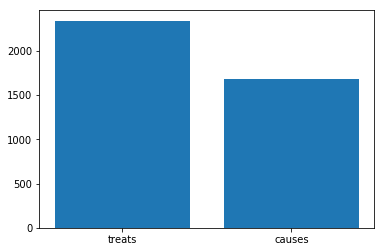

In [16]:
plt.bar(['treats','causes'],relationTest[0].value_counts())

In [17]:
x_train.shape

(13340,)

In [0]:
treatData = []
causeData = []
relation = []
sentence = []
for i in range(13340):
  if y_train[i] == 'treats':
    treatData.append(x_train[i])
    relation.append(y_train[i])
    sentence.append(x_train[i])
  if y_train[i] == 'causes':
    causeData.append(x_train[i])
    relation.append(y_train[i])
    sentence.append(x_train[i])

<BarContainer object of 2 artists>

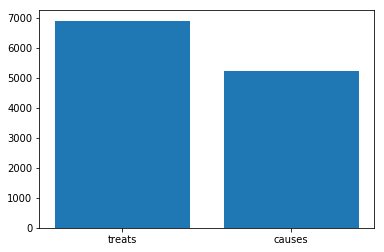

In [19]:
relation = pd.DataFrame(relation)
plt.bar(['treats','causes'],relation[0].value_counts())


### De los gráficos de barras anteriores se puede observar un desbalance entre las clases 'treats' y 'causes' seleccionadas.

### Se seleccionaron estas dos porque se puede observar que abarcan más del 90% de las clases, por lo cual no hay una buena cantidad de datos para entrenar el modelo con las de más clases, que entre 7 se reparten el 10% restante de información

### Hay oraciones repetidas por lo tanto escojeremos solo las unicas.